In [ ]:
"""
Tutor MSAHIN
You can reach me on youtube, twitter, linkedin, medium and github with my @datasciengine username.
"""

In [1]:
import cv2 as cv
import numpy as np
from utils import show_img
import matplotlib.pyplot as plt

## Gradyanlara Kısa Giriş

Bir görsel üzerinde X ve Y eksenleri doğrultusunda çeşitli filtreler kullanılarak görsel gradyanları bulunabilir. Bu iş için en çok kullanılan filtreler Robinson, Sobel, Kirsch ve Scharr filtreleridir.

In [2]:
img = cv.imread("../VisualMaterials/Photos/lady2.jpg")
show_img(img, "lady2")

In [3]:
size = 5
mean_filter = np.ones([size, size], dtype=np.float32) / (size * size)
mean_filter

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [5]:
convolved = cv.filter2D(src=img, ddepth=-1, kernel=mean_filter)
show_img(convolved, "convolved_lady2")

## Rabinson Filter

In [6]:
kernel_robinson = np.array(
    [
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ]
)

convolved_x = cv.filter2D(img, -1, kernel_robinson)
convolved_y = cv.filter2D(img, -1, kernel_robinson.T)

show_img(convolved_x, "robinson_convolved_x")
show_img(convolved_y, "robinson_convolved_y")

## Sobel

Kenarlara ait bilgilerin yatay ve dikey eksende bulunması için Sobel filtresi uygulanmaktadır. Yatay kenarların algılanması X filter (kernel) ile temsil edilirken, dikey kenarların algılanması Y filter (kernel) ile temsil edilmektedir.

In [7]:
kernel_sobel = np.array(
    [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]
)

In [8]:
convolved_x = cv.filter2D(img, -1, kernel_sobel)
convolved_y = cv.filter2D(img, -1, kernel_sobel.T)

show_img(convolved_x, "sobel_convolved_x")
show_img(convolved_y, "sobel_convolved_y")

## Kirsch

Kirsch köşe bulma algoritmalarında sıkça kullanılır.

In [9]:
kernel_kirsch = np.array(
    [
        [-3, 0, 3],
        [-5, 0, 5],
        [-3, 0, 3]
    ]
)

In [10]:
convolved_x = cv.filter2D(img, -1, kernel_kirsch)
convolved_y = cv.filter2D(img, -1, kernel_kirsch.T)

show_img(convolved_x, "kirsch_convolved_x")
show_img(convolved_y, "kirsch_convolved_y")

## Scharr Kerneli

Scharr, Sobel’in geliştirilmiş halidir.

In [11]:
kernel_scharr = np.array(
    [
        [-3, 0, 3],
        [-10, 0, 10],
        [-3, 0, 3]
    ]
)

In [12]:
convolved_x = cv.filter2D(img, -1, kernel_scharr)
convolved_y = cv.filter2D(img, -1, kernel_scharr.T)

show_img(convolved_x, "scharr_convolved_x")
show_img(convolved_y, "scharr_convolved_y")

## Prewitt Kernel

In [13]:
kernelx = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

kernely = np.array(
    [[-1,0,1],
     [-1,0,1],
     [-1,0,1]])

img_prewitt_x = cv.filter2D(img, -1, kernelx)
img_prewitt_y = cv.filter2D(img, -1, kernely)

show_img(img_prewitt_x, "img_prewitt_x")
show_img(img_prewitt_y, "img_prewitt_y")

## Laplacian

Laplas filtresi bastiçe bir resimdeki kenar hatlarını belirlemek için kullanılır. Burada kenar ile kastedilen objeleri genelde arka plandan ayıran keskin renk ayrılıklarıdır. Keskinleştirme Filtresi (Sharpening Filter) ismi ile de anılan laplas filtresi çalışırken bir pencere kullanır.

In [14]:
img = cv.imread('../VisualMaterials/Photos/cows.jpg')
show_img(img, "Cows")

In [15]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_img(gray, "Gray")

Yukarıdaki bu pencerede basitçe her hücreye gelen piksel değeri o hücredeki katsayı ile çarpılır ve sonuçlar toplanarak ortada bulunan pikselin yeni değeri olur.

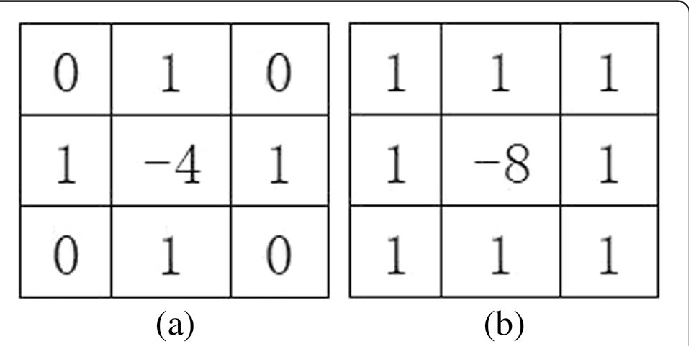

In [16]:
lap = cv.Laplacian(gray, cv.CV_64F, ksize=1)
lap = np.uint8(np.absolute(lap))
show_img(lap, "Laplacian")

## Ne işimize yarar? 

In [17]:
img = cv.imread('../VisualMaterials/Photos/machine.png')
show_img(img, "Machine")

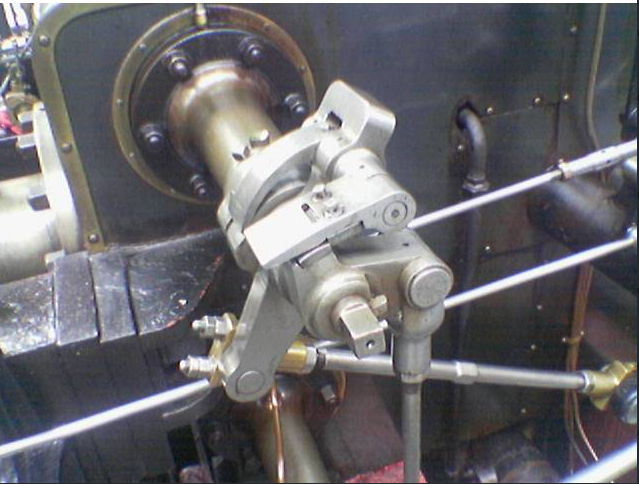

In [18]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_img(gray, "Gray")

In [19]:
sobelx = cv.Sobel(gray, cv.CV_8U, 1, 1)
show_img(sobelx, "Sobel X")

In [20]:
sobelx = cv.Sobel(gray, cv.CV_8UC1, 1, 0)
show_img(sobelx, "Sobel X")

In [21]:
sobely = cv.Sobel(gray, cv.CV_8U, 0, 1)
show_img(sobely, "Sobel Y")

In [22]:
sobely = cv.Sobel(gray, cv.CV_8UC1, 0, 1)
show_img(sobely, "Sobel Y")

In [23]:
combined_sobel = cv.bitwise_or(sobelx, sobely)
show_img(combined_sobel, "Combined Sobel")

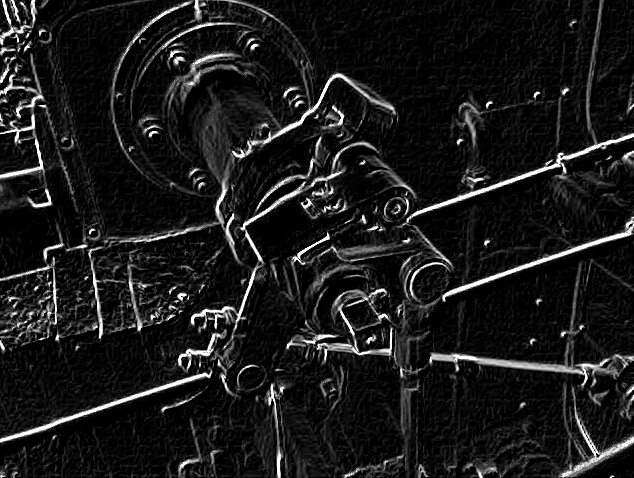

In [26]:
canny = cv.Canny(gray, 150, 175)
show_img(canny, "Canny")

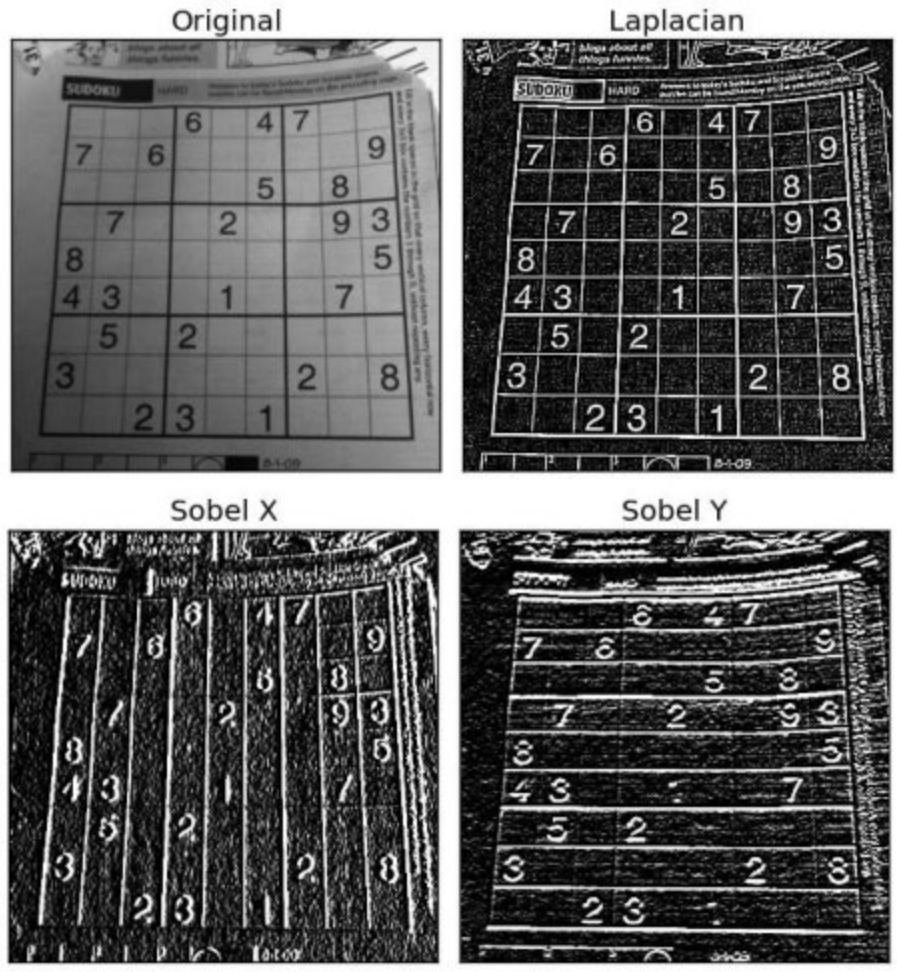